In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor




In [23]:
df = pd.read_csv("BostonHousing.csv")

In [16]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
#print the column list to know the different availabel colimn names to get the their meanings
for i in df.columns:
    print(i)

crim
zn
indus
chas
nox
rm
age
dis
rad
tax
ptratio
b
lstat
medv


The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* crim - per capita crime rate by town
* zn - proportion of residential land zoned for lots over 25,000 sq.ft.
* indus - proportion of non-retail business acres per town.
* chas - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* nox - nitric oxides concentration (parts per 10 million)
* rm- average number of rooms per dwelling
* age - proportion of owner-occupied units built prior to 1940
* dis - weighted distances to five Boston employment centres
* rad - index of accessibility to radial highways
* tax - full-value property-tax rate per 10,000 dollar 
* ptratio - pupil-teacher ratio by town
* b - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* lstat - % lower status of the population
* medv - Median value of owner-occupied homes in $1000's (output variable)

## preprocessing

In [5]:
df.shape

(506, 14)

In [6]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
# statistical analysis
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


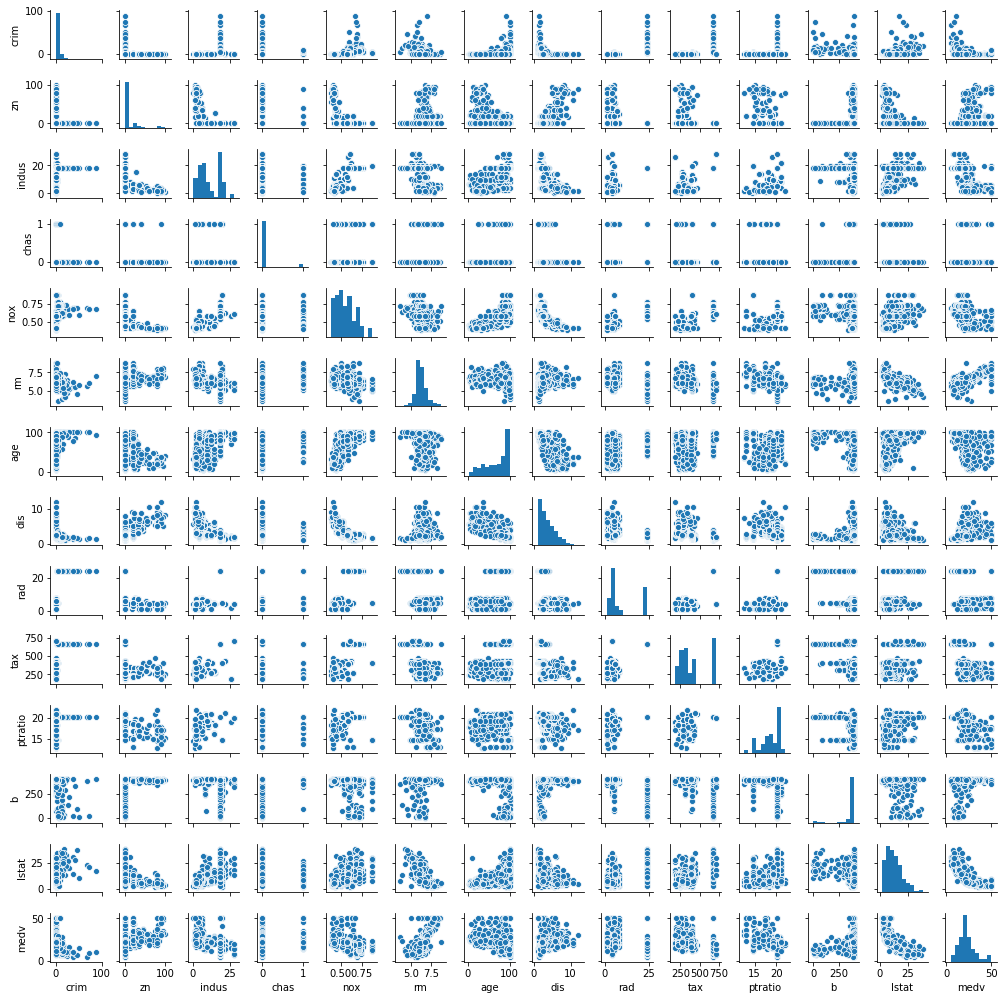

In [9]:
# get a full overall visual to check feature and target relationship
sns.pairplot(data = df, height = 1)

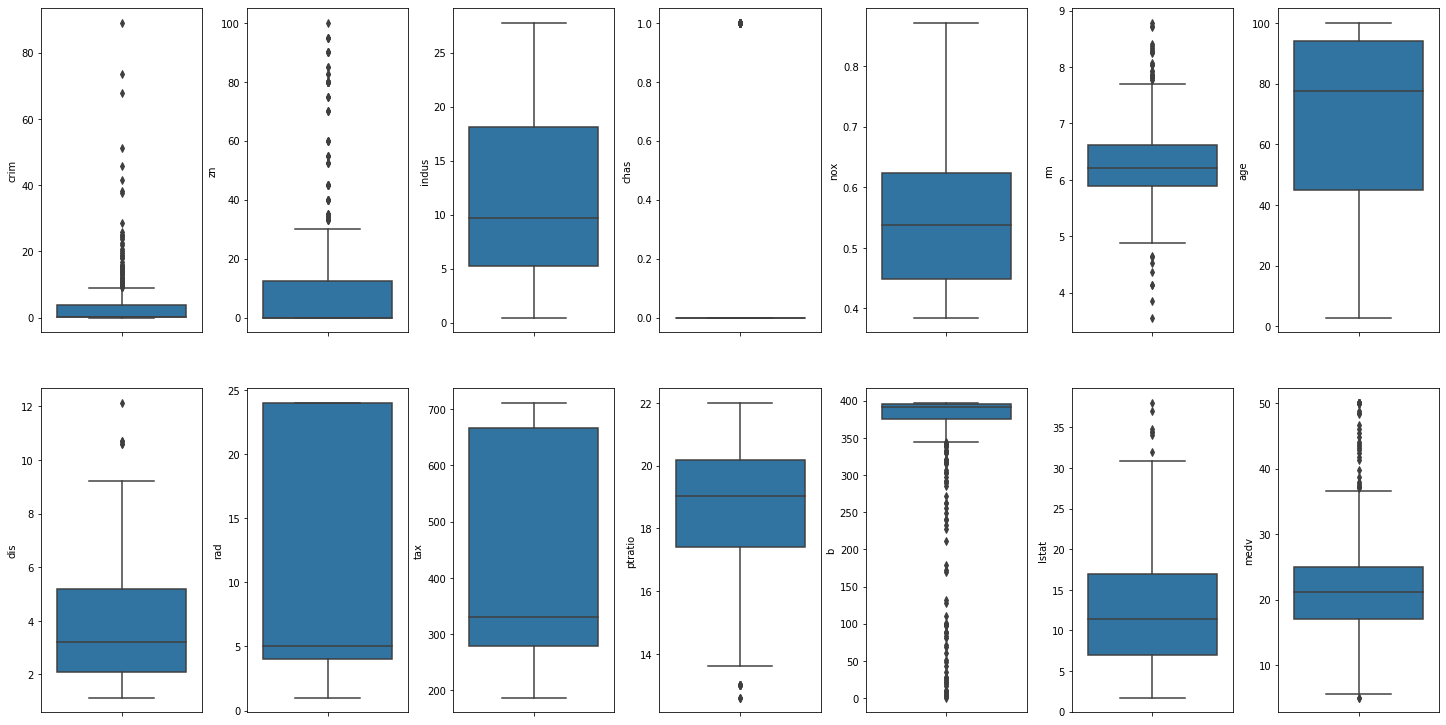

In [10]:
#check for outliers
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


crim, zn, rm, and medv have alot of fliers

plot a histogram with medv and see how the distribution is on other features 

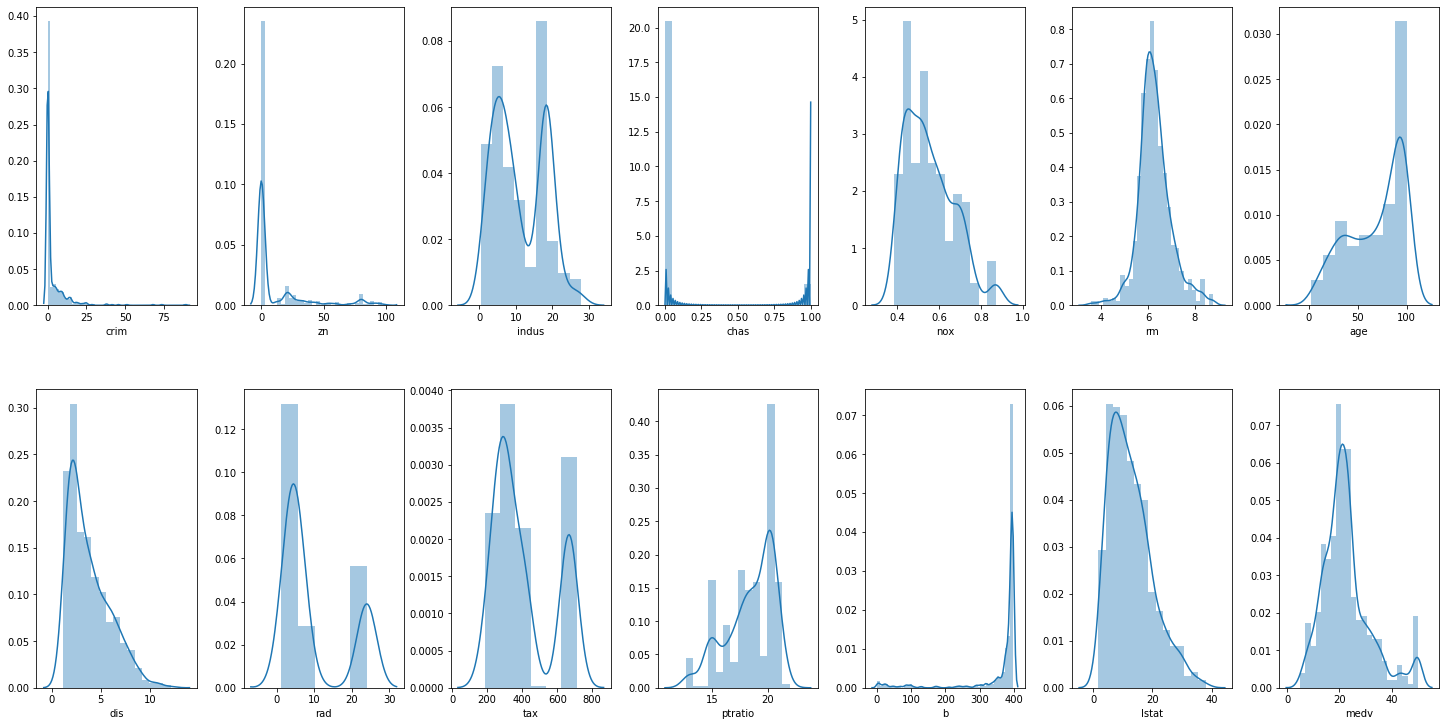

In [17]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

The histogram also shows that columns crim, zn, b has highly skewed distributions. Also MEDV looks to have a normal distribution (the predictions) and other colums seem to have norma or bimodel ditribution of data except CHAS (which is a discrete variable).



lets plot correlation on the data

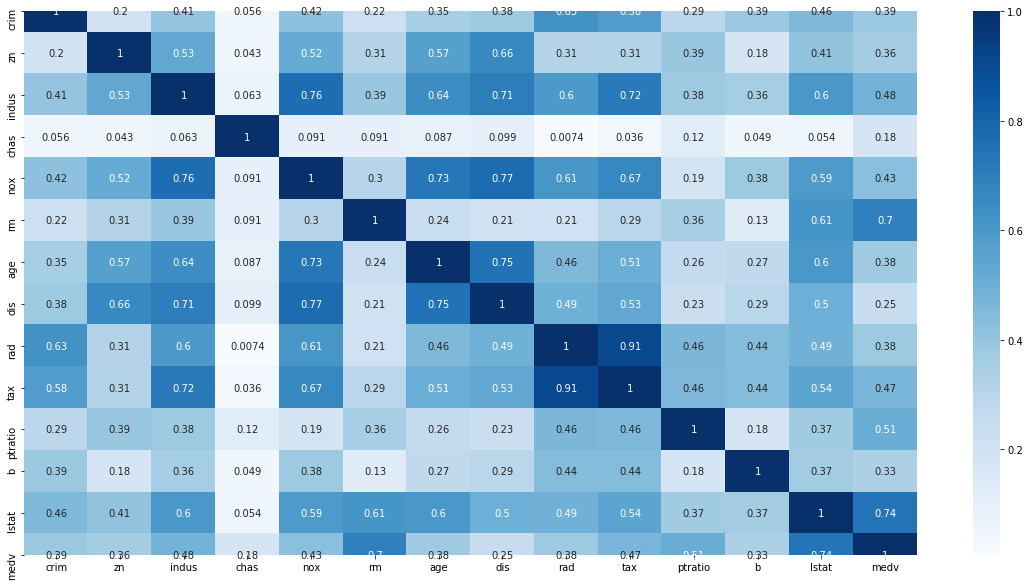

In [18]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True, cmap= 'Blues')


From correlation matrix, we see tax and rad are highly correlated features. The columns lstat, indus, rm, tax, nox, ptratio has a correlation score above 0.5 with medv which is a good indication of using as predictors. 



Let's plot these columns against medv.

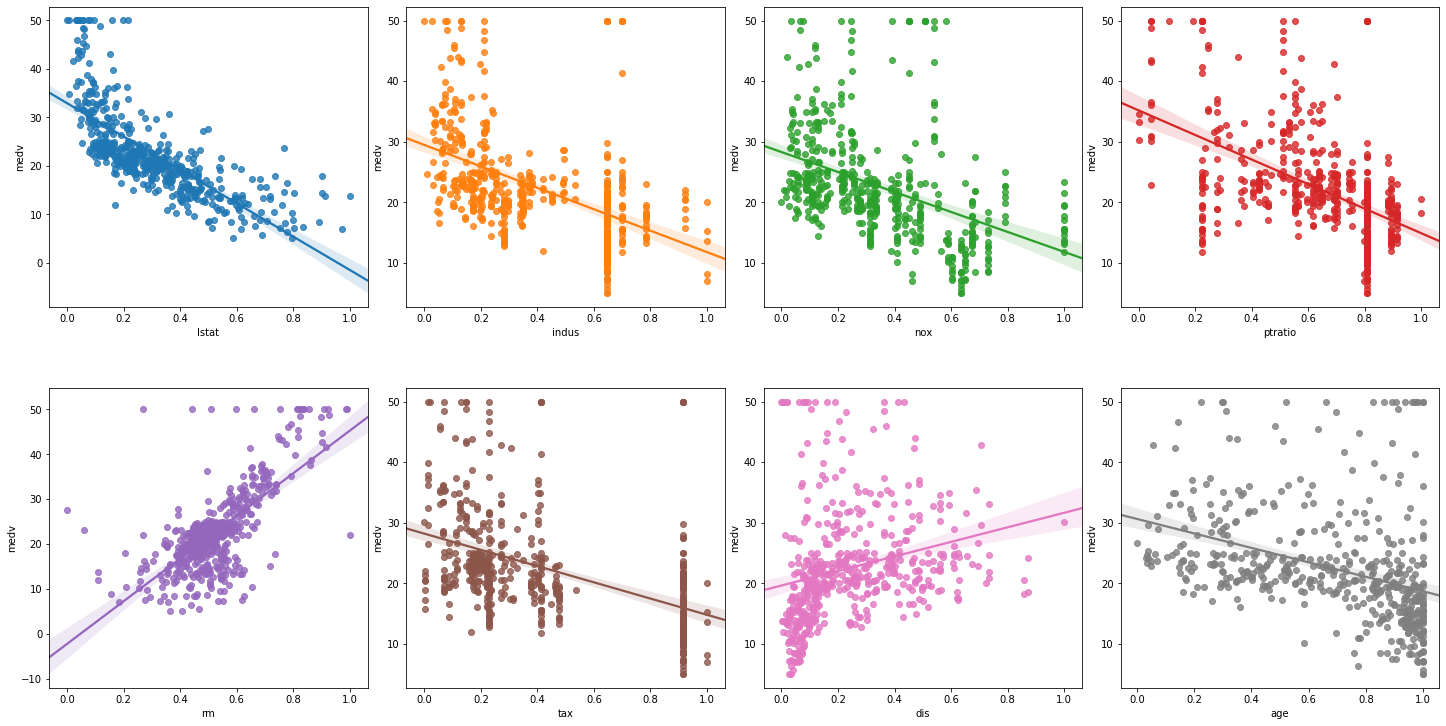

In [19]:
# Let's scale the columns before plotting them against medv
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['lstat', 'indus', 'nox', 'ptratio', 'rm', 'tax', 'dis', 'age']
x = df.loc[:,column_sels]
y = df['medv']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


we can see that this features will make a good prediction with medv from this analysis

In [27]:

# new dataset
df = df[['lstat', 'indus', 'nox', 'ptratio', 'rm', 'tax', 'dis', 'age', 'medv']]
df


,lstat,indus,nox,ptratio,rm,tax,dis,age,medv
0,4.98,2.31,0.538,15.3,6.575,296,4.0900,65.2,24.0
1,9.14,7.07,0.469,17.8,6.421,242,4.9671,78.9,21.6
2,4.03,7.07,0.469,17.8,7.185,242,4.9671,61.1,34.7
3,2.94,2.18,0.458,18.7,6.998,222,6.0622,45.8,33.4
4,5.33,2.18,0.458,18.7,7.147,222,6.0622,54.2,36.2
...,...,...,...,...,...,...,...,...,...
501,9.67,11.93,0.573,21.0,6.593,273,2.4786,69.1,22.4
502,9.08,11.93,0.573,21.0,6.120,273,2.2875,76.7,20.6
503,5.64,11.93,0.573,21.0,6.976,273,2.1675,91.0,23.9
504,6.48,11.93,0.573,21.0,6.794,273,2.3889,89.3,22.0


## model building

In [31]:
# split the data into x and y
x = df.drop("medv", axis = 1)
# create target column
y = df["medv"]

In [37]:
# normalize data
# Feature Scaling with StandardScaler
# build the scaler model
scaler = StandardScaler()

# Fit using train set
scaler.fit(x);

# transform X 
X_scaled = scaler.transform(x)


In [40]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled,  y,
                                                test_size=0.25)
                                                  


for the models, we will use 3 different models and see the performance of the 3 models 

In [57]:
#create the models in form of dictionaru with key values 
models = {'XGB': XGBRegressor(), 'Linear': LinearRegression(),
          'Ridge': Ridge()}


In [58]:
# create a function for the models and score
def fit_and_score_models(models, X_train, X_test, y_train, y_test):
    '''
    this func helps to fits and evaluates the chosen models
    models : a dict of different regression sklearn models
    X_train : training data , no labels
    X_test : testing data, no labels
    y_train : training labels
    y_test: test labels
    
    '''    
    # make a dict to keep model scores
    
    model_scores = {}
    
    # loop through models
    
    for name, model in models.items():
        # fit model to data
        model.fit(X_scaled, y)
        # Evaluate model and append score to model_score
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores


In [59]:
model_scores = fit_and_score_models(models=models,
                            X_train=X_scaled,
                            X_test=X_test,
                            y_train=y,
                            y_test=y_test)
model_scores


{'XGB': 0.9998597231094389,
 'Linear': 0.7248213193310225,
 'Ridge': 0.7250294888366118}

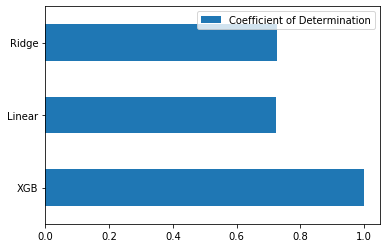

In [60]:
# visualizing the models performance
model_compare = pd.DataFrame(model_scores, index=['Coefficient of Determination'])
model_compare.T.plot.barh();


the XGBregressor has a score of 0.99 which makes it a better model over the other two models i.e ridge and linear. 

now we need to check the errors

In [62]:
# make function to evaluate
def evaluate_preds(y_true, y_preds):
    """
    Function performs evaluation comparison on y_true labels vs y_preds,
    on our regression model
    """
    r2 = r2_score(y_true, y_preds)
    mae = mean_absolute_error(y_true, y_preds)
    mse = mean_squared_error(y_true, y_preds)
    
    metric_dict = {'r2_score': r2_score,
                   'mean_absolute_error' : mean_absolute_error,
                   'mean_squared_error' : mean_squared_error
                  }
    print(f'r2 score: {r2:.2f}')
    print(f'mean absolute error: {mae:.3f}')    
    print(f'mean squared errror: {mse:.4f}')   
    
    return metric_dict


In [ ]:
first train

In [65]:
xgbr = XGBRegressor().fit(X_scaled, y)

In [66]:
train_preds = xgb.predict(X_train)

In [67]:
xgb_y_preds = xgb.predict(X_test)

In [68]:
mae_train_score = metrics.mean_absolute_error(y_train, train_preds)
print(mae_train_score)


0.0512611411806776


In [71]:
train_preds[:10], xgb_y_preds[:10]

(array([25.236736 , 17.170145 , 23.876152 , 17.100761 , 20.61816  ,
         7.3026342, 14.879365 , 45.38096  , 24.161491 , 19.394804 ],
       dtype=float32),
 array([50.001873, 20.339355, 13.148499, 23.996006, 21.259995, 19.15604 ,
        20.368807, 11.954002, 20.043104, 48.53201 ], dtype=float32))

### Evaluation

In [72]:
mae_train_score = metrics.mean_absolute_error(y_train, train_preds)
print(mae_train_score)


0.0512611411806776


In [73]:
# evaluate predictions
xgb_y_metrics = evaluate_preds(y_test, xgb_y_preds)


r2 score: 1.00
mean absolute error: 0.062
mean squared errror: 0.0080


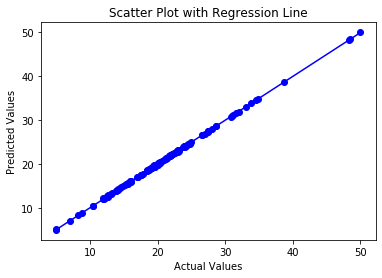

In [82]:
# Scatter plot of y_test vs xgb_y_preds
plt.scatter(y_test, xgb_y_preds, color='blue')

# Regression line
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, xgb_y_preds, 1))(np.unique(y_test)), color='blue')

# Title and labels
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values');


XGBregressor looks overfitting here. we look at ridge

In [75]:
ridge = Ridge().fit(X_scaled, y)
train_preds = ridge.predict(X_train)
ridge_y_preds = ridge.predict(X_test)


In [76]:
mae_train_score = metrics.mean_absolute_error(y_train, train_preds)
print(mae_train_score)


3.6862257946690202


In [77]:
# evaluate predictions
ridge_y_metrics = evaluate_preds(y_test, ridge_y_preds)


r2 score: 0.73
mean absolute error: 2.890
mean squared errror: 15.6005


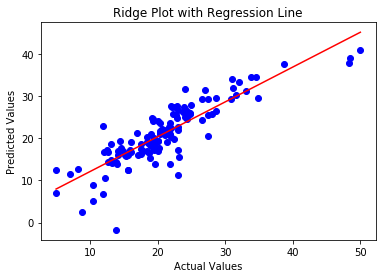

In [81]:
# Scatter plot of y_test vs ridge_y_preds
plt.scatter(y_test, ridge_y_preds, color='blue')

# Regression line
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, ridge_y_preds, 1))(np.unique(y_test)), color='red')

# Title and labels
plt.title('Ridge Plot with Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values');


In [ ]:
the ridge model seems to fit better on this line